In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time_series import TimeSeries


The data set being used are the number of monthly Wifi sessions per month at Chicago Public Libraries from 2011 to 2014.
The data set contains four features: "Month", "Year", "Number of Sessions" and "Cumulative Number of Sessions". In total there are N = 48 data points for the number of sessions. 


What makes this data set interesting to me is its simplicity and the non-linear trend exhibited by the number of sessions over time. It goes without saying that modern libraries are no longer hubs for esoteric readings of hard copy books—it is now a place to go to for quiet reading on your laptop or cellular device. The number of wifi sessions is a good proxy measure for how library usage has changed in our increasingly digital era.

In [2]:
md = TimeSeries('Libraries Wifi.csv')


### 1.1 Plot the time series data

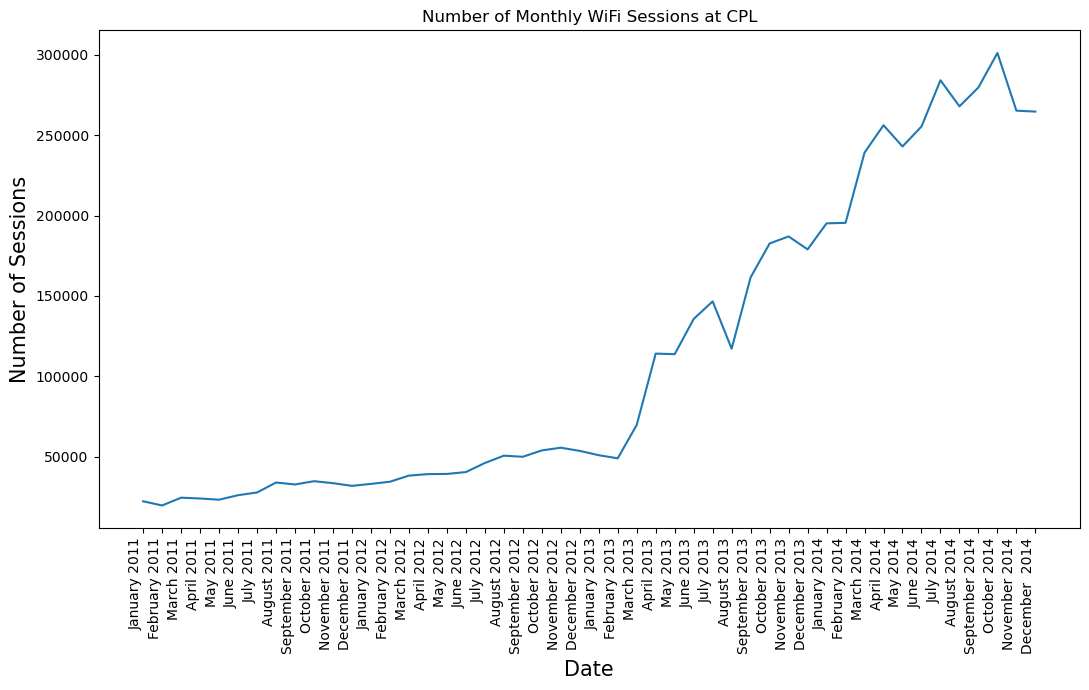

In [3]:
md.plot_series()


The plot looks just about what I would have expected with an increasing trend as a function of time. However, the sharp increase that begins around the end of 2012 is unusual. The reasons for this increase could be a change in the speed of the wifi (upgrading hardware due to an increase in demand) or that personal devices have become cheaper and more accessible so that more people are using the libraries internet. Either way, this graph does show that there is an increasing demand for wifi at Chicago Public Libraries and it is not a linear trend. It would be interesting to see how this trend continues from 2014 to 2021.

### 1.2 Compute the moving average

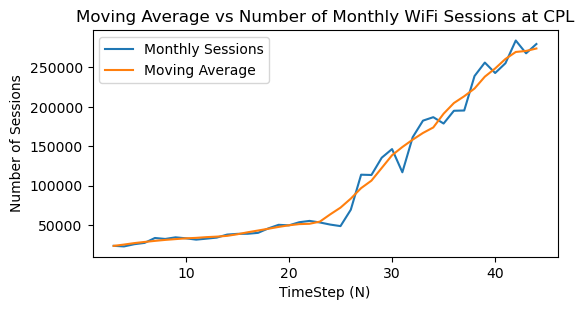

In [4]:
moving_avg = md.moving_avg(m=7)
md.plot_ma(moving_avg)


The moving average has a much smoother slope compared to the actual data. This happens because it averages out the irregularities—the larger the $m$ value, the smoother it gets. 

### 1.3 Fit the moving average to a linear model

#### Model 1 (no intercept)

In [5]:
y_bar = md.moving_avg(m=7)
model1 = md.lstsqr(y_bar, intercept=False)


β1 = 5003.487562939358


#### Model 2 (with intercept)

In [6]:
model2 = md.lstsqr(y_bar)


β0 = -46380.981150713305
β1 = 6562.419229745218


The interpretation for the $B1$ coeffecient in model 2 is that a one unit increase in $x$ will lead to a 6562 unit increase in $y$, which in this case is the number of wifi sessions. Model 2 has a steeper slope compared to model 1.

### 1.4 Determine which model is better

Using the Sum of Squared Residuals, the lower SSR is the better model.

In [7]:
md.lowest_resid(model1, model2)


model 1 SSR 73353204007.0867
model 2 SSR 58751711191.827034


It is quite clear that the better model is model 2 and this isn't surprising since it is utilizing the y-intercept term $B0$ and model 1 does not. The extra flexibility will always make Model 2 better or just as good as model one (if the least squared $\hat{B0}$  estimate is zero then the two models would be equal). 

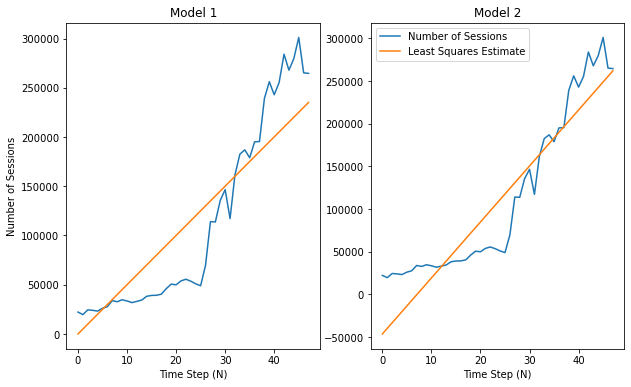

In [8]:
md.model_compar(model1, model2)


Here is a visualization of the model comparison with the real data and their estimated regression line. As you can see the y-intercept term in model 2 makes the estimated line come from a lower angle which fits the data better.

## 1.5 
Compute the moving average with m = 7 and plot it with the original data. How does the moving average change when you modify m?

Text(0.5, 0, 'Time Step')

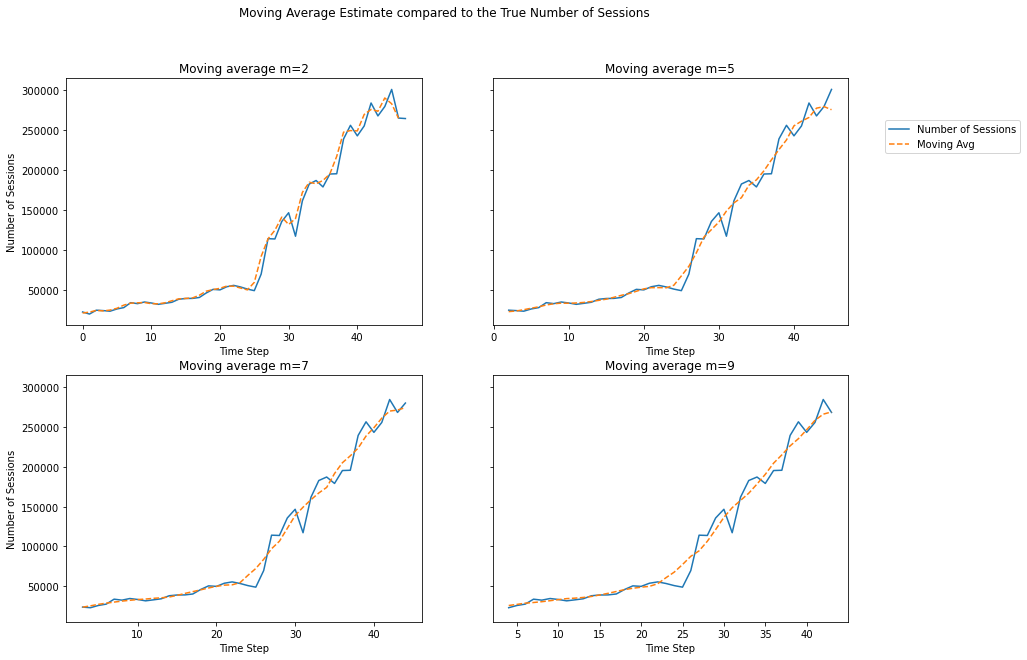

In [9]:
md = TimeSeries('Libraries Wifi.csv')
ma2 = md.moving_avg(2)
ma5 = md.moving_avg(5)
ma7 = md.moving_avg(7)
ma9 = md.moving_avg(9)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(
    2, 2, sharey=True, figsize=(14, 10))

ax1.set_title('Moving average m=2')
ax1.plot(md.num_sessions)
ax1.plot(ma2, linestyle='dashed')
ax1.set_xlabel("Time Step")
ax1.set_ylabel('Number of Sessions')

ax2.set_title('Moving average m=5')
ax2.plot(np.arange(2, 46), md.num_sessions[2:-2])
ax2.plot(np.arange(2, 46), ma5, linestyle='dashed')
ax2.set_xlabel("Time Step")

ax3.set_title('Moving average m=7')
ax3.plot(np.arange(3, 45), md.num_sessions[3:-3])
ax3.plot(np.arange(3, 45), ma7, linestyle='dashed')
ax3.set_xlabel("Time Step")
ax3.set_ylabel('Number of Sessions')

ax4.set_title('Moving average m=9')
ax4.plot(np.arange(4, 44), md.num_sessions[4:-4], label="Number of Sessions")
ax4.plot(np.arange(4, 44), ma9, linestyle='dashed', label="Moving Avg")

fig.suptitle('Moving Average Estimate compared to the True Number of Sessions')
plt.legend(bbox_to_anchor=(1.5, 2.05))
plt.xlabel('Time Step')


As the moving average ($m$) value gets larger, the slope becomes smoother and it doesn't fit the real data as tight compared to the lower $m$ values. This isn't necessary a bad thing since a low moving average ($m$) value will likely overfit the data and lead to worse for future predictions so I would suspect a larger moving average to be more generalizable. 

#### Use your linear models to predict the data point ($y_N$).

In [10]:
def pred_yn(n, m1, m2):
    """Predicts future y values using two different models.
    """
    model1_y = m1['B1'] * n
    model2_y = m2['B0'] + m2['B1'] * n
    print(f'Model 1 predicts point Y_{n} to be: {model1_y}')
    print(f'Model 2 predicts point Y_{n} to be: {model2_y}')


pred_yn(48, model1, model2)
pred_yn(58, model1, model2)


Model 1 predicts point Y_48 to be: 240167.4030210892
Model 2 predicts point Y_48 to be: 268615.1418770572
Model 1 predicts point Y_58 to be: 290202.27865048277
Model 2 predicts point Y_58 to be: 334239.3341745094


Based on these results I believe that the predictions for $y_N$ are reasonable since it is only one time step away and thus the future data point will likely follow the trend line fairly well. Going into the future, I would not be so confident. I believe that the trend going into the future will have a much larger slope compared to the previous years that the linear models were trained on, so their accuracy will only decrease given this assumption. More people rely on the internet, and libraries are increasingly becoming a place for free internet—this means the number of wifi sessions will only continue to increase and at a faster rate than the current slopes of the models. 

To make the model better, more data could be used and perhaps more features other than just the previous number of sessions. Adding a feature that contains the count of the number of people who use the library could be useful since better/more accessible internet could be increasing the number of visitors which also increases the number of sessions. Also, accounting for seasonality could be important. It is likely that more people will use the libraries in the winter when there is less to do outside and schools are in session. 